In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [24]:
team_stats = pd.read_csv("./data/TeamStatistics.csv")
team_stats.head()

,gameId,gameDate,teamCity,teamName,teamId,opponentTeamCity,opponentTeamName,opponentTeamId,home,win,...,leadChanges,pointsFastBreak,pointsFromTurnovers,pointsInThePaint,pointsSecondChance,timesTied,timeoutsRemaining,seasonWins,seasonLosses,coachId
0,42400407,2025-06-22 20:00:00,Indiana,Pacers,1610612754,Oklahoma City,Thunder,1610612760,0,0,...,11.0,7.0,10.0,26.0,15.0,10.0,0.0,3.0,4.0,NaN
1,42400407,2025-06-22 20:00:00,Oklahoma City,Thunder,1610612760,Indiana,Pacers,1610612754,1,1,...,11.0,9.0,32.0,40.0,22.0,10.0,0.0,4.0,3.0,NaN
2,42400406,2025-06-19 20:30:00,Indiana,Pacers,1610612754,Oklahoma City,Thunder,1610612760,1,1,...,1.0,22.0,19.0,30.0,14.0,1.0,1.0,3.0,3.0,NaN
3,42400406,2025-06-19 20:30:00,Oklahoma City,Thunder,1610612760,Indiana,Pacers,1610612754,0,0,...,1.0,11.0,13.0,40.0,6.0,1.0,1.0,3.0,3.0,NaN
4,42400405,2025-06-16 20:30:00,Indiana,Pacers,1610612754,Oklahoma City,Thunder,1610612760,0,0,...,6.0,13.0,9.0,48.0,21.0,2.0,0.0,2.0,3.0,NaN


In [25]:
team_stats.gameDate = pd.to_datetime(team_stats.gameDate)
team_stats.gameDate.dtype

dtype('<M8[ns]')

In [ ]:
#Return games from 2000-2025 seasons
print("Total DF length: ", len(team_stats))
team_stats_trim = team_stats[team_stats.gameDate > pd.to_datetime('2000-10', format= '%Y-%m')]
print("Length after trim: ", len(team_stats_trim))
team_stats_trim.head(-5)


Total DF length:  143758
Length after trim:  67850


,gameId,gameDate,teamCity,teamName,teamId,opponentTeamCity,opponentTeamName,opponentTeamId,home,win,...,leadChanges,pointsFastBreak,pointsFromTurnovers,pointsInThePaint,pointsSecondChance,timesTied,timeoutsRemaining,seasonWins,seasonLosses,coachId
0,42400407,2025-06-22 20:00:00,Indiana,Pacers,1610612754,Oklahoma City,Thunder,1610612760,0,0,...,11.0,7.0,10.0,26.0,15.0,10.0,0.0,3.0,4.0,NaN
1,42400407,2025-06-22 20:00:00,Oklahoma City,Thunder,1610612760,Indiana,Pacers,1610612754,1,1,...,11.0,9.0,32.0,40.0,22.0,10.0,0.0,4.0,3.0,NaN
2,42400406,2025-06-19 20:30:00,Indiana,Pacers,1610612754,Oklahoma City,Thunder,1610612760,1,1,...,1.0,22.0,19.0,30.0,14.0,1.0,1.0,3.0,3.0,NaN
3,42400406,2025-06-19 20:30:00,Oklahoma City,Thunder,1610612760,Indiana,Pacers,1610612754,0,0,...,1.0,11.0,13.0,40.0,6.0,1.0,1.0,3.0,3.0,NaN
4,42400405,2025-06-16 20:30:00,Indiana,Pacers,1610612754,Oklahoma City,Thunder,1610612760,0,0,...,6.0,13.0,9.0,48.0,21.0,2.0,0.0,2.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67840,20000005,2000-10-31 20:00:00,Toronto,Raptors,1610612761,Detroit,Pistons,1610612765,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67841,20000005,2000-10-31 20:00:00,Detroit,Pistons,1610612765,Toronto,Raptors,1610612761,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67842,20000007,2000-10-31 20:00:00,Dallas,Mavericks,1610612742,Milwaukee,Bucks,1610612749,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67843,20000007,2000-10-31 20:00:00,Milwaukee,Bucks,1610612749,Dallas,Mavericks,1610612742,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
team_stats_trim[team_stats_trim.isna().any(axis=1)]


,gameId,gameDate,teamCity,teamName,teamId,opponentTeamCity,opponentTeamName,opponentTeamId,home,win,...,leadChanges,pointsFastBreak,pointsFromTurnovers,pointsInThePaint,pointsSecondChance,timesTied,timeoutsRemaining,seasonWins,seasonLosses,coachId
0,42400407,2025-06-22 20:00:00,Indiana,Pacers,1610612754,Oklahoma City,Thunder,1610612760,0,0,...,11.0,7.0,10.0,26.0,15.0,10.0,0.0,3.0,4.0,NaN
1,42400407,2025-06-22 20:00:00,Oklahoma City,Thunder,1610612760,Indiana,Pacers,1610612754,1,1,...,11.0,9.0,32.0,40.0,22.0,10.0,0.0,4.0,3.0,NaN
2,42400406,2025-06-19 20:30:00,Indiana,Pacers,1610612754,Oklahoma City,Thunder,1610612760,1,1,...,1.0,22.0,19.0,30.0,14.0,1.0,1.0,3.0,3.0,NaN
3,42400406,2025-06-19 20:30:00,Oklahoma City,Thunder,1610612760,Indiana,Pacers,1610612754,0,0,...,1.0,11.0,13.0,40.0,6.0,1.0,1.0,3.0,3.0,NaN
4,42400405,2025-06-16 20:30:00,Indiana,Pacers,1610612754,Oklahoma City,Thunder,1610612760,0,0,...,6.0,13.0,9.0,48.0,21.0,2.0,0.0,2.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67845,20000002,2000-10-31 19:30:00,New Jersey,Nets,1610612751,Cleveland,Cavaliers,1610612739,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67846,20000003,2000-10-31 19:30:00,Orlando,Magic,1610612753,Washington,Wizards,1610612764,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67847,20000003,2000-10-31 19:30:00,Washington,Wizards,1610612764,Orlando,Magic,1610612753,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67848,20000004,2000-10-31 19:30:00,Atlanta,Hawks,1610612737,Charlotte,Hornets,1610612766,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
team_stats_trim[team_stats_trim.coachId.notna()]


,gameId,gameDate,teamCity,teamName,teamId,opponentTeamCity,opponentTeamName,opponentTeamId,home,win,...,leadChanges,pointsFastBreak,pointsFromTurnovers,pointsInThePaint,pointsSecondChance,timesTied,timeoutsRemaining,seasonWins,seasonLosses,coachId


In [42]:
###coachID is always missing so we will drop
team_stats_trim = team_stats_trim.drop('coachId', axis=1)
team_stats_trim.head()

,gameId,gameDate,teamCity,teamName,teamId,opponentTeamCity,opponentTeamName,opponentTeamId,home,win,...,biggestScoringRun,leadChanges,pointsFastBreak,pointsFromTurnovers,pointsInThePaint,pointsSecondChance,timesTied,timeoutsRemaining,seasonWins,seasonLosses
0,42400407,2025-06-22 20:00:00,Indiana,Pacers,1610612754,Oklahoma City,Thunder,1610612760,0,0,...,7.0,11.0,7.0,10.0,26.0,15.0,10.0,0.0,3.0,4.0
1,42400407,2025-06-22 20:00:00,Oklahoma City,Thunder,1610612760,Indiana,Pacers,1610612754,1,1,...,13.0,11.0,9.0,32.0,40.0,22.0,10.0,0.0,4.0,3.0
2,42400406,2025-06-19 20:30:00,Indiana,Pacers,1610612754,Oklahoma City,Thunder,1610612760,1,1,...,12.0,1.0,22.0,19.0,30.0,14.0,1.0,1.0,3.0,3.0
3,42400406,2025-06-19 20:30:00,Oklahoma City,Thunder,1610612760,Indiana,Pacers,1610612754,0,0,...,8.0,1.0,11.0,13.0,40.0,6.0,1.0,1.0,3.0,3.0
4,42400405,2025-06-16 20:30:00,Indiana,Pacers,1610612754,Oklahoma City,Thunder,1610612760,0,0,...,6.0,6.0,13.0,9.0,48.0,21.0,2.0,0.0,2.0,3.0


In [48]:
team_stats_trim[team_stats_trim.isna().any(axis=1)]

,gameId,gameDate,teamCity,teamName,teamId,opponentTeamCity,opponentTeamName,opponentTeamId,home,win,teamScore,opponentScore,assists,blocks,steals,fieldGoalsAttempted,fieldGoalsMade,fieldGoalsPercentage,threePointersAttempted,threePointersMade,threePointersPercentage,freeThrowsAttempted,freeThrowsMade,freeThrowsPercentage,reboundsDefensive,reboundsOffensive,reboundsTotal,foulsPersonal,turnovers,plusMinusPoints,numMinutes,q1Points,q2Points,q3Points,q4Points,benchPoints,biggestLead,biggestScoringRun,leadChanges,pointsFastBreak,pointsFromTurnovers,pointsInThePaint,pointsSecondChance,timesTied,timeoutsRemaining,seasonWins,seasonLosses
376,22400988,2025-04-01 20:00:00,Orlando,Magic,1610612753,San Antonio,Spurs,1610612759,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,38.0
377,22400988,2025-04-01 20:00:00,San Antonio,Spurs,1610612759,Orlando,Magic,1610612753,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,39.0
572,22400627,2025-03-19 21:00:00,Utah,Jazz,1610612762,Washington,Wizards,1610612764,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,32.0
573,22400627,2025-03-19 21:00:00,Washington,Wizards,1610612764,Utah,Jazz,1610612762,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,36.0
982,22400798,2025-02-21 19:00:00,Orlando,Magic,1610612753,Memphis,Grizzlies,1610612763,1,0,104,105,23.0,9.0,7.0,88.0,36.0,0.409091,31.0,9.0,0.290323,33.0,23.0,0.69697,37.0,13.0,62.0,21.0,12.0,NaN,240.0,22.0,31.0,30.0,21.0,22.0,19.0,14.0,6.0,17.0,21.0,52.0,22.0,11.0,1.0,28.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67845,20000002,2000-10-31 19:30:00,New Jersey,Nets,1610612751,Cleveland,Cavaliers,1610612739,1,0,82,86,24.0,8.0,9.0,85.0,31.0,0.365000,10.0,3.0,0.300000,26.0,17.0,0.65400,35.0,12.0,47.0,31.0,15.0,-4.0,240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67846,20000003,2000-10-31 19:30:00,Orlando,Magic,1610612753,Washington,Wizards,1610612764,1,1,97,86,20.0,9.0,10.0,79.0,34.0,0.430000,16.0,6.0,0.375000,33.0,23.0,0.69700,29.0,8.0,37.0,24.0,15.0,11.0,240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67847,20000003,2000-10-31 19:30:00,Washington,Wizards,1610612764,Orlando,Magic,1610612753,0,0,86,97,20.0,1.0,6.0,72.0,33.0,0.458000,7.0,4.0,0.571000,24.0,16.0,0.66700,35.0,9.0,44.0,28.0,27.0,-11.0,240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67848,20000004,2000-10-31 19:30:00,Atlanta,Hawks,1610612737,Charlotte,Hornets,1610612766,1,0,82,106,14.0,2.0,9.0,81.0,30.0,0.370000,15.0,6.0,0.400000,21.0,16.0,0.76200,18.0,11.0,29.0,31.0,13.0,-24.0,240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
team_stats_trim.isna().sum()

gameId                         0
gameDate                       0
teamCity                       0
teamName                       0
teamId                         0
opponentTeamCity               0
opponentTeamName               0
opponentTeamId                 0
home                           0
win                            0
teamScore                      0
opponentScore                  0
assists                        4
blocks                         4
steals                         4
fieldGoalsAttempted            4
fieldGoalsMade                 4
fieldGoalsPercentage           4
threePointersAttempted         4
threePointersMade              4
threePointersPercentage        4
freeThrowsAttempted            4
freeThrowsMade                 4
freeThrowsPercentage           5
reboundsDefensive              4
reboundsOffensive              4
reboundsTotal                  4
foulsPersonal                  4
turnovers                      4
plusMinusPoints              476
numMinutes

In [ ]:
#Drio the several columns with mostly missing data
team_stats_trim = team_stats_trim.drop(columns=
                                       team_stats_trim.columns[team_stats_trim.isna().sum() > 1_000])


In [73]:
team_stats_trim['season'] = team_stats_trim['gameDate'].apply(
    lambda d: d.year if d.month >= 10 else d.year - 1
)


In [82]:
team_season_stats = (
    team_stats_trim
    .groupby(['teamName', 'season'])
    .agg({
        'teamScore': 'mean',
        'opponentScore': 'mean',
        'assists': 'mean',
        'fieldGoalsAttempted': 'mean',
        'fieldGoalsMade': 'mean',
        'freeThrowsAttempted': 'mean',
        'freeThrowsMade': 'mean',
        'reboundsDefensive': 'mean',
        'reboundsOffensive': 'mean',
        'turnovers': 'mean',
        'blocks': 'mean',
        'steals': 'mean',
        'foulsPersonal': 'mean',
        'win': 'sum',
        'gameId': 'count'
    })
    .rename(columns={'gameId': 'games_played'})
    .reset_index()
)

In [83]:
team_season_stats

,teamName,season,teamScore,opponentScore,assists,fieldGoalsAttempted,fieldGoalsMade,freeThrowsAttempted,freeThrowsMade,reboundsDefensive,reboundsOffensive,turnovers,blocks,steals,foulsPersonal,win,games_played
0,76ers,2000,94.161905,90.838095,20.485714,79.485714,35.095238,27.571429,20.638095,31.276190,13.333333,15.304762,4.961905,8.333333,20.457143,68,105
1,76ers,2001,90.873563,89.873563,19.942529,78.206897,33.977011,26.022989,20.229885,30.770115,13.275862,15.264368,4.402299,8.620690,19.977011,45,87
2,76ers,2002,96.234043,94.117021,21.255319,80.329787,35.946809,27.308511,21.255319,29.489362,12.627660,14.712766,3.340426,9.893617,22.244681,54,94
3,76ers,2003,87.879518,90.421687,19.843373,76.373494,32.626506,24.554217,18.530120,29.409639,11.469880,15.879518,4.349398,7.963855,20.855422,33,83
4,76ers,2004,98.433333,99.433333,20.677778,81.433333,35.644444,26.822222,21.000000,30.511111,10.877778,15.488889,3.866667,9.211111,23.100000,46,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,Wizards,2020,115.719512,118.231707,25.195122,90.719512,42.878049,26.036585,19.951220,35.500000,9.695122,14.536585,4.243902,7.317073,21.804878,37,82
742,Wizards,2021,108.425287,112.068966,24.827586,86.057471,40.333333,22.137931,17.241379,34.344828,8.942529,13.172414,5.091954,6.494253,19.045977,35,87
743,Wizards,2022,112.694118,114.047059,25.388235,86.964706,41.929412,22.435294,17.600000,34.082353,9.447059,14.117647,5.235294,6.917647,18.858824,36,85
744,Wizards,2023,113.576471,122.600000,27.752941,91.447059,42.788235,20.341176,15.611765,32.023529,9.211765,13.952941,5.117647,7.717647,19.976471,17,85


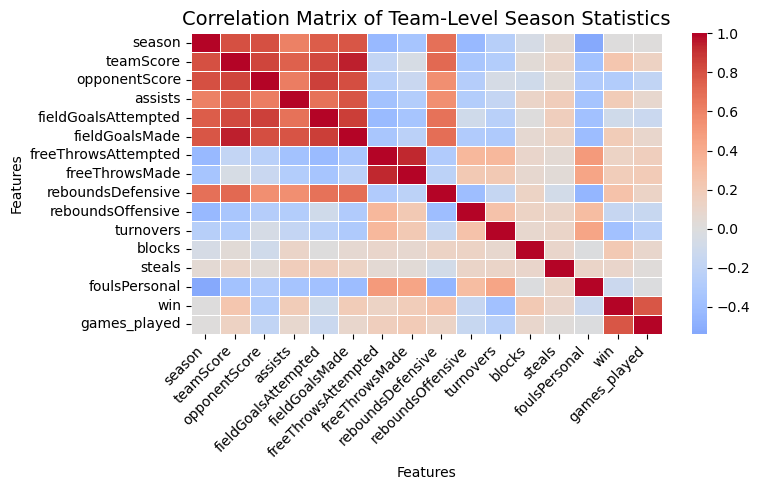

In [98]:

numeric_df = team_season_stats.select_dtypes('number')

plt.figure(figsize=(8,5))
sns.heatmap(
    numeric_df.corr(),
    cmap='coolwarm', center=0,
    linewidths=0.5, annot=False
)
plt.title('Correlation Matrix of Team-Level Season Statistics', fontsize=14)
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

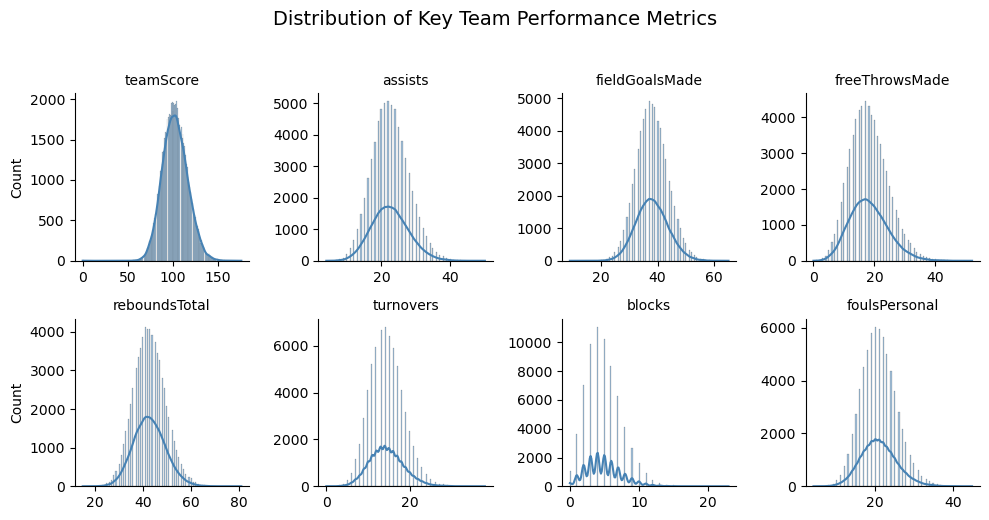

In [101]:
metrics = [
        'teamScore',
        'assists',
        'fieldGoalsMade',
        'freeThrowsMade',
        'reboundsTotal',
        'turnovers',
        'blocks',
        'foulsPersonal',
]

# Reshape for facet plotting
df_melted = team_stats_trim.melt(value_vars=metrics, var_name='Metric', value_name='Value')

g = sns.FacetGrid(df_melted, col='Metric', col_wrap=4, sharex=False, sharey=False, height=2.5)
g.map_dataframe(sns.histplot, x='Value', kde=True, color='steelblue')
g.set_titles(col_template='{col_name}')
g.set_axis_labels('', 'Count')
plt.suptitle('Distribution of Key Team Performance Metrics', y=1.03, fontsize=14)
plt.tight_layout()
plt.show()